In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score

In [3]:
data = pd.read_csv('Fraud_Analysis_Dataset.csv')

In [4]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0


In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [6]:
# Overview of data
print(data.info())           # Check for data types and missing values
print(data.describe())       # Summary statistics for numerical columns
print(data.head())           # View the first few rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB
None
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  11142.000000  1.114200e+04   1.114200e+04    1.114200e+04   
mean       8.717645  2.131915e+05   9.241173e+05    8.249576e+05   
std       16.067479  7.600650e+05   2.143004e+06    2.089894e+06   
min       

In [7]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [8]:
# Calculate the isFraud distribution
class_distribution = data['isFraud'].value_counts(normalize=True)

In [9]:
class_distribution

isFraud
0    0.897505
1    0.102495
Name: proportion, dtype: float64

In [30]:
type_counts = data['type'].value_counts()

<Axes: xlabel='type'>

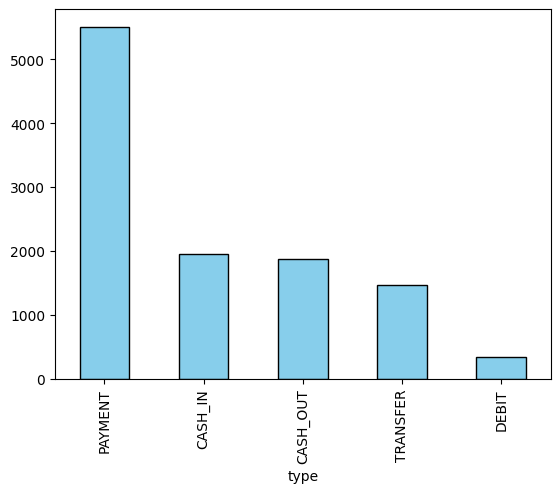

In [32]:
type_counts.plot(kind='bar', color='skyblue', edgecolor='black')

C:\Users\HP\AppData\Local\Temp\ipykernel_14812\2657695566.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


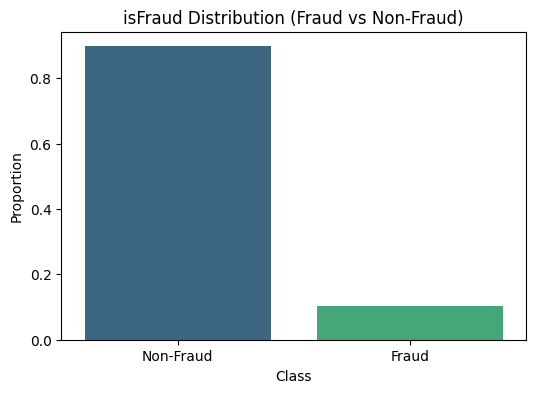

In [9]:
# Plotting Class Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title('isFraud Distribution (Fraud vs Non-Fraud)')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.ylabel('Proportion')
plt.xlabel('Class')
plt.show()

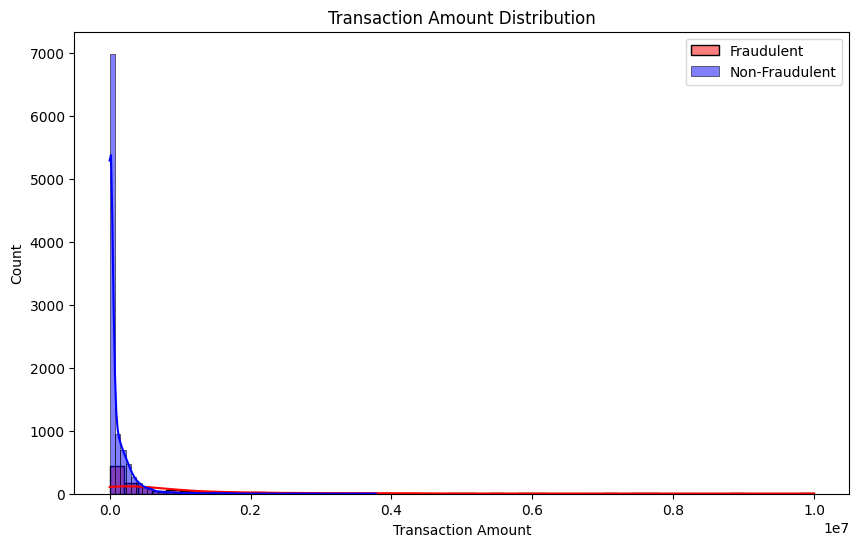

In [10]:
# Exploring amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[data['isFraud'] == 1]['amount'], bins=50, color='red', label='Fraudulent', kde=True)
sns.histplot(data[data['isFraud'] == 0]['amount'], bins=50, color='blue', label='Non-Fraudulent', kde=True)
plt.legend()
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.show()

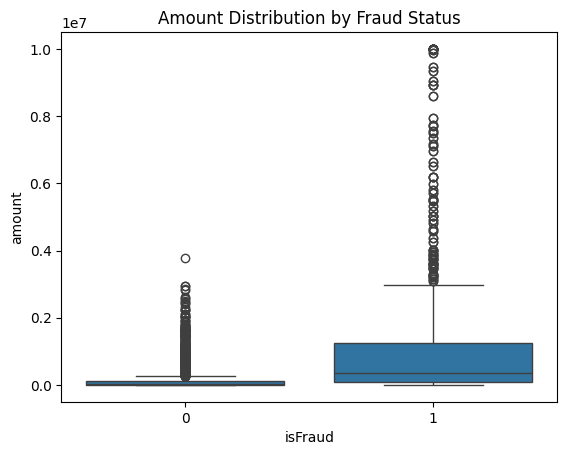

In [11]:
sns.boxplot(x='isFraud', y='amount', data=data)
plt.title("Amount Distribution by Fraud Status")
plt.show()

In [8]:
# Step 4: Feature Engineering
data['balance_diff'] = data['oldbalanceOrg'] - data['newbalanceOrig']

In [9]:
data['balance_diff']

0           181.00
1           181.00
2          2806.00
3          2806.00
4         20128.00
           ...    
11137      6393.70
11138    298799.54
11139    127891.14
11140      1094.03
11141      9235.58
Name: balance_diff, Length: 11142, dtype: float64

In [10]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balance_diff
0,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,181.00
1,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,181.00
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,2806.00
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,2806.00
4,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,20128.00
...,...,...,...,...,...,...,...,...,...,...,...
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0,6393.70
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0,298799.54
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0,127891.14
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0,1094.03


In [14]:
data = pd.get_dummies(data, columns=['type'], drop_first=True)

#### data

In [16]:
# Step 5: Split Data
X = data.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = data['isFraud']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Step 6: Train Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

In [19]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    print(f"\n{name}")
    print("Classification Report:\n", classification_report(y_test, preds))
    print(f"ROC-AUC: {roc_auc_score(y_test, preds)}")
    print(f"Accuracy score: {accuracy}")

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      2996
           1       0.71      0.82      0.76       347

    accuracy                           0.95      3343
   macro avg       0.84      0.89      0.87      3343
weighted avg       0.95      0.95      0.95      3343

ROC-AUC: 0.892577711684744
Accuracy score: 0.9467544122046067

Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2996
           1       1.00      0.97      0.98       347

    accuracy                           1.00      3343
   macro avg       1.00      0.98      0.99      3343
weighted avg       1.00      1.00      1.00      3343

ROC-AUC: 0.9827089337175792
Accuracy score: 0.9964104098115465

Gradient Boosting
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      

In [20]:
d = {
    'Model Name': ['logistic regression',' Random forest',' Gradient Boosting','XGBoostion'],
    'Accuracy': ['94.67%','99.67%','99.64%','99.5%'],
    "ROC-AUC": ['0.89','0.98','0.98','0.98']
}
df = pd.DataFrame(data=d)
df

,Model Name,Accuracy,ROC-AUC
0,logistic regression,94.67%,0.89
1,Random forest,99.67%,0.98
2,Gradient Boosting,99.64%,0.98
3,XGBoostion,99.5%,0.98


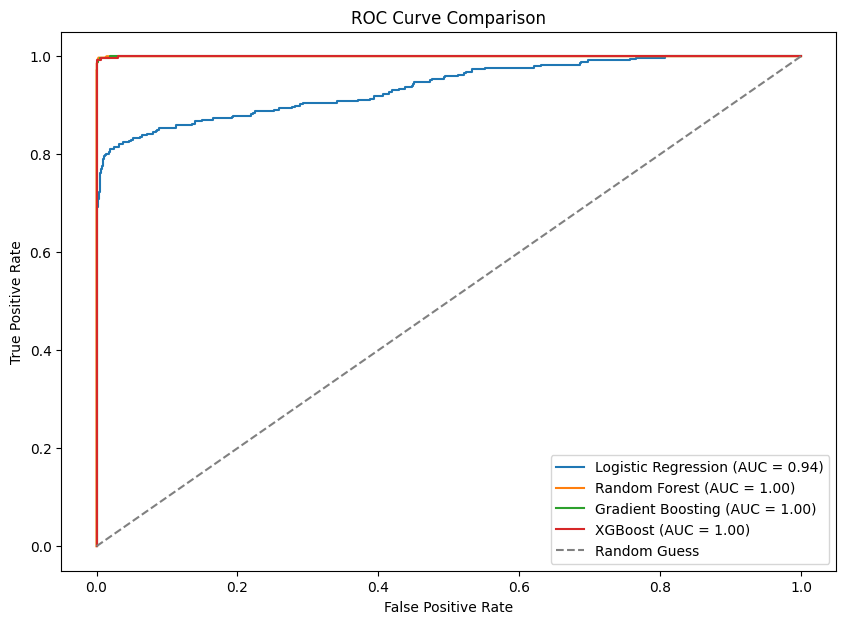

In [21]:
# Store ROC data for each model
model_roc_data = {}

# Train models and calculate AUC-ROC
for name, model in models.items():
    probas = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    roc_auc = auc(fpr, tpr)
    model_roc_data[name] = (fpr, tpr, roc_auc)

# Plot ROC Curves
plt.figure(figsize=(10, 7))
for name, (fpr, tpr, roc_auc) in model_roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], label="Random Guess", color='gray', linestyle='--')  # Random guess line
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


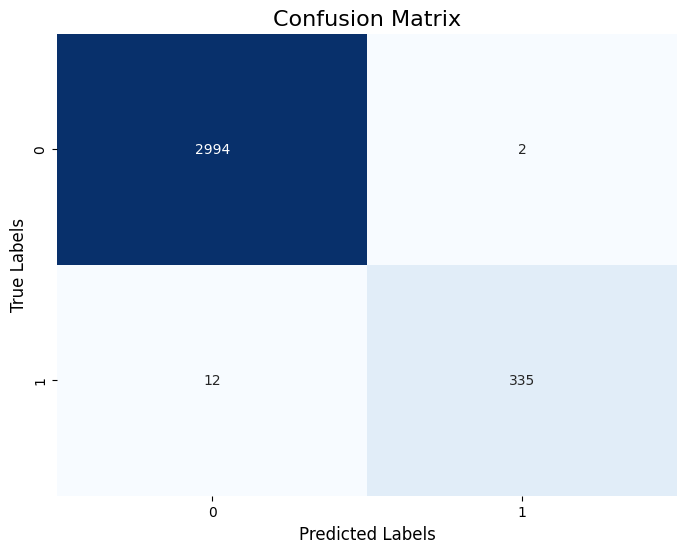

In [22]:
# Step 8: Visualize Results
conf_matrix = confusion_matrix(y_test, preds)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.show()

In [23]:
# Step 7: Financial Impact Analysis
avg_fraud_loss = np.average(data[data['isFraud'] == 1]['amount'])  #average of amount where fraud is true which is 1
detected_frauds = sum((y_test == 1) & (preds == 1))  #actual fraud and Predicted frauds.
false_alarms = sum((y_test == 0) & (preds == 1))     #actual not-fraud and Predicted frauds.
financial_impact = detected_frauds * avg_fraud_loss - false_alarms * 100 

print(f"Average fraud loss: ${avg_fraud_loss}")
print(f"Decated fraud: {detected_frauds}")
print(f"False alarm: {false_alarms}")
print(f"Financial Impact: ${financial_impact}")

Average fraud loss: $1192628.9320753065
Decated fraud: 335
False alarm: 2
Financial Impact: $399530492.2452277


In [3]:
FIA = {
    "Financial Impact Analysis": ["Average fraud loss","Decated fraud","False alarm","Financial Impact"],
    "Values": ["$11,92,628.93","335","2","$39,95,30,492.24"]
}
fia_table = pd.DataFrame(data=FIA)
fia_table

,Financial Impact Analysis,Values
0,Average fraud loss,"$11,92,628.93"
1,Decated fraud,335
2,False alarm,2
3,Financial Impact,"$39,95,30,492.24"
